In [453]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from random import randint

In [454]:
def maps_func(x):
    x -= (t3 := x // 3) * 3
    t2 = x // 2
    return t3 * 12 + t2 * 7

prices = {
    "chest": lambda x: x * 5,
    "necklace": lambda x: x * 3,
    "barrel": lambda x: x * 1,
    "hook": lambda x: x * 1,
    "map": maps_func,
}
prices_list = [
    lambda x: x * 5,
    lambda x: x * 3,
    lambda x: x * 1,
    lambda x: x * 1,
    maps_func,
]
loot_names = [
    "chest",
    "necklace",
    "barrel",
    "hook",
    "map",
]

In [455]:
X_train = [
    [
        randint(0, 5),
        randint(0, 5),
        randint(0, 5),
        randint(0, 5),
        randint(0, 5)
    ]
    for _ in range(1000)
]

In [456]:
X_train

[[4, 1, 0, 1, 1],
 [4, 4, 1, 3, 4],
 [4, 2, 5, 4, 4],
 [1, 1, 3, 5, 2],
 [3, 3, 3, 0, 0],
 [5, 1, 4, 5, 1],
 [5, 0, 0, 2, 4],
 [4, 5, 0, 1, 5],
 [2, 2, 1, 3, 0],
 [5, 0, 5, 1, 0],
 [3, 4, 1, 4, 0],
 [2, 4, 4, 5, 3],
 [2, 1, 3, 2, 4],
 [1, 2, 3, 0, 4],
 [5, 2, 1, 1, 1],
 [3, 3, 0, 3, 1],
 [4, 5, 3, 3, 5],
 [1, 0, 4, 1, 0],
 [3, 4, 0, 4, 3],
 [1, 3, 4, 0, 4],
 [4, 1, 1, 3, 0],
 [3, 3, 5, 4, 1],
 [3, 0, 3, 1, 3],
 [1, 2, 0, 4, 0],
 [4, 4, 1, 1, 5],
 [3, 0, 0, 5, 5],
 [0, 4, 4, 3, 0],
 [3, 5, 5, 3, 0],
 [4, 4, 5, 0, 5],
 [5, 2, 3, 1, 1],
 [1, 1, 5, 1, 0],
 [1, 1, 5, 3, 2],
 [3, 5, 4, 5, 4],
 [3, 5, 1, 0, 5],
 [2, 5, 3, 3, 0],
 [4, 0, 5, 3, 0],
 [5, 4, 5, 5, 4],
 [5, 0, 0, 3, 5],
 [1, 0, 1, 4, 3],
 [2, 2, 2, 1, 0],
 [3, 4, 0, 1, 0],
 [1, 0, 2, 3, 4],
 [2, 2, 3, 2, 2],
 [4, 2, 1, 1, 1],
 [0, 3, 3, 4, 2],
 [3, 2, 0, 5, 3],
 [5, 1, 5, 4, 3],
 [2, 4, 3, 5, 0],
 [4, 5, 0, 0, 4],
 [0, 5, 4, 1, 1],
 [2, 1, 1, 2, 5],
 [0, 0, 3, 3, 4],
 [2, 0, 1, 4, 1],
 [2, 1, 4, 3, 5],
 [4, 1, 2, 5, 5],
 [0, 3, 4,

In [457]:
Y_train = [
    [sum([prices_list[i](x_arr[i]) for i in range(len(x_arr))])]
    for x_arr in X_train
]

In [458]:
X_train, Y_train = torch.Tensor(X_train), torch.Tensor(Y_train)

In [468]:
Y_train

tensor([[24.],
        [48.],
        [47.],
        [23.],
        [27.],
        [37.],
        [39.],
        [55.],
        [20.],
        [31.],
        [32.],
        [43.],
        [30.],
        [26.],
        [33.],
        [27.],
        [60.],
        [10.],
        [43.],
        [30.],
        [27.],
        [33.],
        [31.],
        [15.],
        [53.],
        [39.],
        [19.],
        [38.],
        [56.],
        [35.],
        [14.],
        [23.],
        [51.],
        [50.],
        [31.],
        [28.],
        [59.],
        [47.],
        [22.],
        [19.],
        [28.],
        [22.],
        [28.],
        [28.],
        [23.],
        [38.],
        [49.],
        [30.],
        [47.],
        [20.],
        [35.],
        [18.],
        [15.],
        [39.],
        [49.],
        [33.],
        [43.],
        [24.],
        [44.],
        [31.],
        [24.],
        [31.],
        [58.],
        [32.],
        [38.],
        [44.],
        [3

In [459]:
class SimpleLinearModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(5, 30),
            torch.nn.ReLU(),
            torch.nn.Linear(30, 1)
        )
    
    def forward(self, X):
        return self.layers(X)


In [460]:
game_model = SimpleLinearModel()
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.Adam(game_model.parameters(), lr=0.01)

In [461]:
def train_step(model: torch.nn.Module, x, y, loss_fn, optimizer):
    model.train()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

def test_step(model: torch.nn.Module, x, y, epoch, loss_fn):
    model.eval()
    with torch.inference_mode():
        test_y_pred = model(x)
        test_loss = loss_fn(test_y_pred, y)
        print(f"Epoch {epoch} | Test loss: {test_loss}")

In [462]:
loss_data = []
for epoch in range(10000):
    loss_data.append(train_step(game_model, X_train, Y_train, loss_fn, optimizer))
    test_step(game_model, x=X_train, y=Y_train, epoch=epoch, loss_fn=loss_fn)

Epoch 0 | Test loss: 31.129987716674805
Epoch 1 | Test loss: 30.591243743896484
Epoch 2 | Test loss: 30.033967971801758
Epoch 3 | Test loss: 29.45345115661621
Epoch 4 | Test loss: 28.84406852722168
Epoch 5 | Test loss: 28.20108985900879
Epoch 6 | Test loss: 27.518957138061523
Epoch 7 | Test loss: 26.79448890686035
Epoch 8 | Test loss: 26.024526596069336
Epoch 9 | Test loss: 25.205860137939453
Epoch 10 | Test loss: 24.334671020507812
Epoch 11 | Test loss: 23.408418655395508
Epoch 12 | Test loss: 22.420629501342773
Epoch 13 | Test loss: 21.367685317993164
Epoch 14 | Test loss: 20.248437881469727
Epoch 15 | Test loss: 19.06496810913086
Epoch 16 | Test loss: 17.821300506591797
Epoch 17 | Test loss: 16.517410278320312
Epoch 18 | Test loss: 15.163999557495117
Epoch 19 | Test loss: 13.764851570129395
Epoch 20 | Test loss: 12.358088493347168
Epoch 21 | Test loss: 10.975920677185059
Epoch 22 | Test loss: 9.651275634765625
Epoch 23 | Test loss: 8.44970417022705
Epoch 24 | Test loss: 7.4362068176

C:\Users\dewre\AppData\Local\Temp\ipykernel_12428\2953787053.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


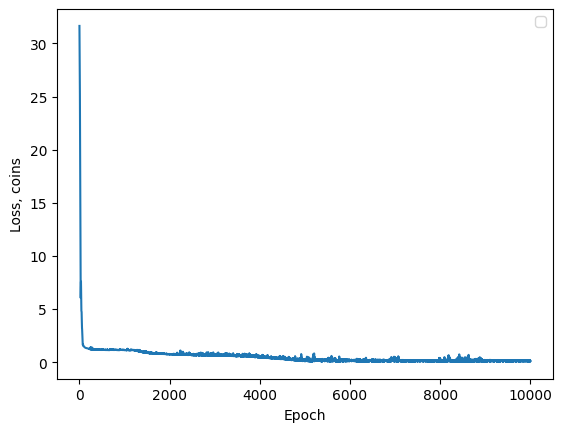

In [463]:
plt.plot([x for x in range(10000)], loss_data)
plt.xlabel('Epoch')
plt.ylabel('Loss, coins')
plt.legend()

In [464]:
dict(game_model.state_dict())

{'layers.0.weight': tensor([[ 8.5363e-01,  6.2055e-01,  5.2247e-02, -1.0276e-01,  1.1254e+00],
         [ 8.3085e-01,  3.1524e-01,  1.5984e-03,  1.5976e-01,  9.1837e-01],
         [ 7.5945e-01,  3.0968e-01,  6.0456e-02,  2.2071e-01,  1.1920e+00],
         [ 2.9918e-01,  1.5945e-01,  2.3911e-01,  2.4045e-01,  4.7641e-01],
         [ 2.8280e-01,  4.0473e-01,  3.3893e-03,  1.1186e-01,  8.8489e-01],
         [ 7.2540e-01,  2.7779e-01,  3.6623e-01,  2.2366e-01,  3.8928e-01],
         [ 7.9341e-01,  3.8807e-01, -1.2960e-01,  4.5509e-02,  1.0059e+00],
         [-7.0435e-02, -1.7006e-02,  2.8271e-02,  8.6767e-03,  4.6794e-02],
         [ 7.2108e-01,  5.4986e-01,  3.0669e-01,  3.0667e-01,  3.6071e-01],
         [-3.1219e-01, -1.2963e-01, -8.1241e-02, -1.0770e-01, -2.8902e-01],
         [ 2.3841e-01,  3.9195e-02, -1.0914e-01, -2.0002e-01,  6.6144e-02],
         [-1.4995e+00, -1.0554e+00, -6.6964e-02, -2.8641e-01, -2.0762e+00],
         [ 1.2233e-01,  9.4908e-02,  5.8573e-02,  3.1572e-02,  1.0127

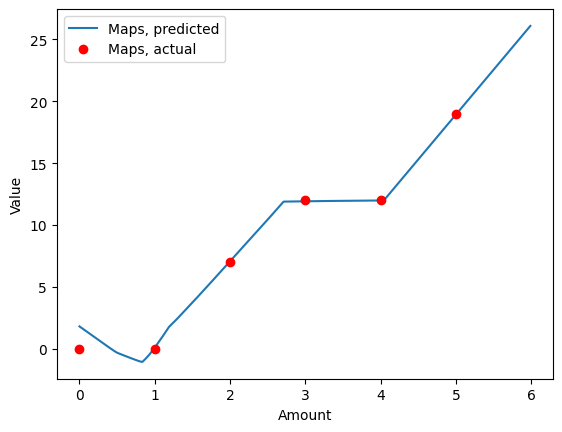

In [465]:
maps_data = game_model(torch.Tensor([[0, 0, 0, 0, x / 100] for x in range(600)]))
plt.plot([x / 100 for x in range(600)], maps_data.detach().numpy(), label='Maps, predicted')
for x in range(6):
    actual_maps_val, = plt.plot(x, maps_func(x), 'ro')
actual_maps_val.set_label('Maps, actual')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.legend()

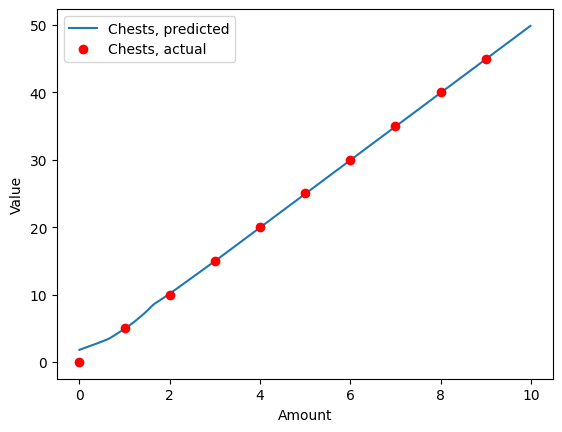

In [467]:
maps_data = game_model(torch.Tensor([[x / 100, 0, 0, 0, 0] for x in range(1000)]))
plt.plot([x / 100 for x in range(1000)], maps_data.detach().numpy(), label='Chests, predicted')
for x in range(10):
    actual_maps_val, = plt.plot(x, x * 5, 'ro')
actual_maps_val.set_label('Chests, actual')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.legend()